# Lecture 5 

In [1]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

data_array = data.to_numpy()
data_labels = data_array[:, -1]

In [3]:
from sklearn.preprocessing import StandardScaler

np.random.shuffle(data_array)

data_features = data_array[:, :-1]
data_labels = data_array[:, -1]

standard_scaler = StandardScaler()
normalized_data_features = standard_scaler.fit_transform(data_features)

print(normalized_data_features.shape)
print(normalized_data_features)

(768, 8)
[[-0.25095213  0.28497518  0.45982725 ... -0.4559673  -0.4496241
   0.06459135]
 [-1.14185152  1.84983245  0.45982725 ...  3.4785293   5.88356477
  -0.70119842]
 [ 0.93691372  1.19259239 -0.26394125 ... -0.58288655 -0.53720754
   0.57511787]
 ...
 [-0.84488505  0.72313521  0.66661825 ...  1.18129096  0.4080896
  -0.44593516]
 [-0.25095213  1.66204957 -0.57412775 ...  0.1151693   0.36580794
   0.23476686]
 [ 0.04601433 -0.68523633 -0.05715025 ...  0.10247738 -0.98720523
  -0.0204964 ]]


In [4]:
print(data_labels)

[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0.

In [5]:
from sklearn.preprocessing import OneHotEncoder

one_hot_labels = OneHotEncoder(max_categories=2, sparse=False).fit_transform(np.reshape(data_labels, (-1, 1)))
print(one_hot_labels)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [6]:
training_data_size = int(len(data_array) * 0.7)

train_data = normalized_data_features[:training_data_size]
test_data = normalized_data_features[training_data_size:]

train_data_x = normalized_data_features[:training_data_size]
train_data_y = one_hot_labels[:training_data_size]

test_data_x = normalized_data_features[training_data_size:]
test_data_y = one_hot_labels[training_data_size:]

In [7]:
from tensorflow import keras

2023-02-16 16:31:46.653039: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 16:31:46.826878: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-16 16:31:46.831890: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-16 16:31:46.831909: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

## Building a sequential model using Keras API

In [8]:
model = keras.Sequential()
model.add(keras.Input(shape=(8,))) # the shape of the input, in this example the number of features is 8
model.add(keras.layers.Dense(1024, activation='sigmoid'))
# the number of neurons in the outputs have to be the same as the size of the one-hot vector
model.add(keras.layers.Dense(2, activation='sigmoid'))
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              9216      
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 11,266
Trainable params: 11,266
Non-trainable params: 0
_________________________________________________________________


2023-02-16 16:31:48.703242: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-16 16:31:48.703287: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-16 16:31:48.703319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PSLPT514): /proc/driver/nvidia/version does not exist
2023-02-16 16:31:48.703998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.0))

In [10]:
model.fit(train_data_x, train_data_y, batch_size=8, epochs=200)

Epoch 1/200
68/68 [==============================] - 1s 2ms/step - loss: 10.1889
Epoch 2/200
68/68 [==============================] - 0s 2ms/step - loss: 4.9195
Epoch 3/200
68/68 [==============================] - 0s 2ms/step - loss: 3.4340
Epoch 4/200
68/68 [==============================] - 0s 1ms/step - loss: 2.1400
Epoch 5/200
68/68 [==============================] - 0s 1ms/step - loss: 2.6068
Epoch 6/200
68/68 [==============================] - 0s 2ms/step - loss: 1.3177
Epoch 7/200
68/68 [==============================] - 0s 1ms/step - loss: 1.7377
Epoch 8/200
68/68 [==============================] - 0s 1ms/step - loss: 2.0136
Epoch 9/200
68/68 [==============================] - 0s 1ms/step - loss: 1.4145
Epoch 10/200
68/68 [==============================] - 0s 1ms/step - loss: 1.3980
Epoch 11/200
68/68 [==============================] - 0s 2ms/step - loss: 1.0476
Epoch 12/200
68/68 [==============================] - 0s 2ms/step - loss: 1.1379
Epoch 13/200
68/68 [================

In [11]:
train_predicted_probabilites = model.predict(train_data_x)
test_predicted_probabilities = model.predict(test_data_x)

8/8 [==============================] - 0s 2ms/step


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support

def print_metrics(predicted_y, data_y, threshold=0.5):
    predicted_label = predicted_y >= threshold
    true_label = data_y >= threshold
    acc = accuracy_score(true_label, predicted_label)
    print(f'accuracy (at threshold {threshold}): {acc}')

    confusion = confusion_matrix(true_label, predicted_label)
    print('')
    print('confusion matrix:')
    print(confusion)

    fnr = confusion[1, 0] / (confusion[0, 0] + confusion[1, 0])
    fpr = confusion[0, 1] / (confusion[0, 1] + confusion[1, 1])
    print('')
    print(f'FNR: {fnr}')
    print(f'FPR: {fpr}')

    roc_fpr, roc_tpr, roc_thresholds = roc_curve(data_y, predicted_y)
    roc_auc = auc(roc_fpr, roc_tpr)

    print('')
    print(f'auc: {roc_auc}')

    precision, recall, fscore, _ = precision_recall_fscore_support(true_label, predicted_label, average='binary')

    print('')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'fscore: {fscore}')


In [13]:
print('----------------')
print('training metrics')
print('----------------')
print_metrics(train_predicted_probabilites[:, 1], train_data_y[:, 1])

print('')
print('------------')
print('test metrics')
print('------------')
print_metrics(test_predicted_probabilities[:, 1], test_data_y[:, 1])

----------------
training metrics
----------------
accuracy (at threshold 0.5): 0.9124767225325885

confusion matrix:
[[333   9]
 [ 38 157]]

FNR: 0.10242587601078167
FPR: 0.05421686746987952

auc: 0.9747488379067326

precision: 0.9457831325301205
recall: 0.8051282051282052
fscore: 0.8698060941828255

------------
test metrics
------------
accuracy (at threshold 0.5): 0.7316017316017316

confusion matrix:
[[121  37]
 [ 25  48]]

FNR: 0.17123287671232876
FPR: 0.43529411764705883

auc: 0.7630483787064332

precision: 0.5647058823529412
recall: 0.6575342465753424
fscore: 0.6075949367088608


## Adding Dropout

In [14]:
model = keras.Sequential()
model.add(keras.Input(shape=(8,))) 
model.add(keras.layers.Dense(1024, activation='sigmoid'))
model.add(keras.layers.Dropout(0.5)) # half of the neurons in the previous layer will be dropped randomly
model.add(keras.layers.Dense(2, activation='sigmoid'))
 
model.summary()
68/68 [==============================] - 0s 1ms/step - loss: 0.4123
Epoch 90/200
68/68 [==============================] - 0s 1ms/step - loss: 0.3791
Epoch 91/200

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              9216      
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 11,266
Trainable params: 11,266
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.0))
model.fit(train_data_x, train_data_y, batch_size=8, epochs=200)

Epoch 1/200
68/68 [==============================] - 0s 2ms/step - loss: 7.8230
Epoch 2/200
68/68 [==============================] - 0s 2ms/step - loss: 4.8329
Epoch 3/200
68/68 [==============================] - 0s 2ms/step - loss: 5.3581
Epoch 4/200
68/68 [==============================] - 0s 2ms/step - loss: 4.5049
Epoch 5/200
68/68 [==============================] - 0s 1ms/step - loss: 3.5285
Epoch 6/200
68/68 [==============================] - 0s 2ms/step - loss: 3.7294
Epoch 7/200
68/68 [==============================] - 0s 2ms/step - loss: 3.7678
Epoch 8/200
68/68 [==============================] - 0s 2ms/step - loss: 2.9200
Epoch 9/200
68/68 [==============================] - 0s 2ms/step - loss: 2.4341
Epoch 10/200
68/68 [==============================] - 0s 2ms/step - loss: 2.1128
Epoch 11/200
68/68 [==============================] - 0s 2ms/step - loss: 2.7091
Epoch 12/200
68/68 [==============================] - 0s 2ms/step - loss: 2.1919
Epoch 13/200
68/68 [=================

In [16]:
train_predicted_probabilites = model.predict(train_data_x)
test_predicted_probabilities = model.predict(test_data_x)

print('----------------')
print('training metrics')
print('----------------')
print_metrics(train_predicted_probabilites[:, 1], train_data_y[:, 1])

print('')
print('------------')
print('test metrics')
print('------------')
print_metrics(test_predicted_probabilities[:, 1], test_data_y[:, 1])

8/8 [==============================] - 0s 1ms/step
----------------
training metrics
----------------
accuracy (at threshold 0.5): 0.8901303538175046

confusion matrix:
[[307  35]
 [ 24 171]]

FNR: 0.07250755287009064
FPR: 0.16990291262135923

auc: 0.9552406657669815

precision: 0.8300970873786407
recall: 0.8769230769230769
fscore: 0.8528678304239402

------------
test metrics
------------
accuracy (at threshold 0.5): 0.683982683982684

confusion matrix:
[[106  52]
 [ 21  52]]

FNR: 0.16535433070866143
FPR: 0.5

auc: 0.7662562857638286

precision: 0.5
recall: 0.7123287671232876
fscore: 0.5875706214689266


## Using ReLU in hidden layers

In [17]:
model = keras.Sequential()
model.add(keras.Input(shape=(8,))) 
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='sigmoid'))
 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              9216      
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 11,266
Trainable params: 11,266
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.01))
model.fit(train_data_x, train_data_y, batch_size=8, epochs=200)

Epoch 1/200
68/68 [==============================] - 0s 2ms/step - loss: 0.6682
Epoch 2/200
68/68 [==============================] - 0s 2ms/step - loss: 0.6225
Epoch 3/200
68/68 [==============================] - 0s 1ms/step - loss: 0.5915
Epoch 4/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5633
Epoch 5/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5456
Epoch 6/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5240
Epoch 7/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5165
Epoch 8/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5002
Epoch 9/200
68/68 [==============================] - 0s 1ms/step - loss: 0.4913
Epoch 10/200
68/68 [==============================] - 0s 1ms/step - loss: 0.4862
Epoch 11/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4769
Epoch 12/200
68/68 [==============================] - 0s 1ms/step - loss: 0.4745
Epoch 13/200
68/68 [=================

In [19]:
train_predicted_probabilites = model.predict(train_data_x)
test_predicted_probabilities = model.predict(test_data_x)

print('----------------')
print('training metrics')
print('----------------')
print_metrics(train_predicted_probabilites[:, 1], train_data_y[:, 1])

print('')
print('------------')
print('test metrics')
print('------------')
print_metrics(test_predicted_probabilities[:, 1], test_data_y[:, 1])

8/8 [==============================] - 0s 2ms/step
----------------
training metrics
----------------
accuracy (at threshold 0.5): 0.8528864059590316

confusion matrix:
[[308  34]
 [ 45 150]]

FNR: 0.1274787535410765
FPR: 0.18478260869565216

auc: 0.9123706702654072

precision: 0.8152173913043478
recall: 0.7692307692307693
fscore: 0.79155672823219

------------
test metrics
------------
accuracy (at threshold 0.5): 0.7142857142857143

confusion matrix:
[[117  41]
 [ 25  48]]

FNR: 0.176056338028169
FPR: 0.4606741573033708

auc: 0.788624934974857

precision: 0.5393258426966292
recall: 0.6575342465753424
fscore: 0.5925925925925926


## Using Leaky ReLU in hidden layers

In [20]:
model = keras.Sequential()
model.add(keras.Input(shape=(8,))) 
model.add(keras.layers.Dense(1024, activation=None))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='sigmoid'))
 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              9216      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1024)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 11,266
Trainable params: 11,266
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.01))
model.fit(train_data_x, train_data_y, batch_size=8, epochs=200)

Epoch 1/200
68/68 [==============================] - 0s 2ms/step - loss: 0.6719
Epoch 2/200
68/68 [==============================] - 0s 2ms/step - loss: 0.6200
Epoch 3/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5889
Epoch 4/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5636
Epoch 5/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5433
Epoch 6/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5233
Epoch 7/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5113
Epoch 8/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4990
Epoch 9/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4920
Epoch 10/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4833
Epoch 11/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4766
Epoch 12/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4711
Epoch 13/200
68/68 [=================

In [22]:
train_predicted_probabilites = model.predict(train_data_x)
test_predicted_probabilities = model.predict(test_data_x)

print('----------------')
print('training metrics')
print('----------------')
print_metrics(train_predicted_probabilites[:, 1], train_data_y[:, 1])

print('')
print('------------')
print('test metrics')
print('------------')
print_metrics(test_predicted_probabilities[:, 1], test_data_y[:, 1])

8/8 [==============================] - 0s 1ms/step
----------------
training metrics
----------------
accuracy (at threshold 0.5): 0.8566108007448789

confusion matrix:
[[311  31]
 [ 46 149]]

FNR: 0.12885154061624648
FPR: 0.17222222222222222

auc: 0.9086969560653771

precision: 0.8277777777777777
recall: 0.764102564102564
fscore: 0.7946666666666665

------------
test metrics
------------
accuracy (at threshold 0.5): 0.7316017316017316

confusion matrix:
[[121  37]
 [ 25  48]]

FNR: 0.17123287671232876
FPR: 0.43529411764705883

auc: 0.7895786370730015

precision: 0.5647058823529412
recall: 0.6575342465753424
fscore: 0.6075949367088608


## Model Valdiation and Selection

In [23]:
training_data_size = int(len(data_array) * 0.7)
validation_data_size = int(len(data_array) * 0.15)

train_data_x = normalized_data_features[:training_data_size]
train_data_y = one_hot_labels[:training_data_size]

validation_data_x = normalized_data_features[training_data_size:training_data_size + validation_data_size]
validation_data_y = one_hot_labels[training_data_size:training_data_size + validation_data_size]

test_data_x = normalized_data_features[training_data_size + validation_data_size:]
test_data_y = one_hot_labels[training_data_size + validation_data_size:]

In [24]:
model = keras.Sequential()
model.add(keras.Input(shape=(8,))) 
model.add(keras.layers.Dense(1024, activation=None))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='sigmoid'))
 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              9216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 11,266
Trainable params: 11,266
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
             metrics=['binary_accuracy'])

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='model.hdf5',
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history = model.fit(train_data_x, 
          train_data_y, 
          validation_data=(validation_data_x, validation_data_y),
          batch_size=8, 
          epochs=200,
          callbacks=[model_checkpoint_callback])

Epoch 1/200
68/68 [==============================] - 1s 5ms/step - loss: 0.6739 - binary_accuracy: 0.6173 - val_loss: 0.6519 - val_binary_accuracy: 0.7043
Epoch 2/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6207 - binary_accuracy: 0.7374 - val_loss: 0.6185 - val_binary_accuracy: 0.7304
Epoch 3/200
68/68 [==============================] - 0s 3ms/step - loss: 0.5895 - binary_accuracy: 0.7570 - val_loss: 0.5966 - val_binary_accuracy: 0.7348
Epoch 4/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5592 - binary_accuracy: 0.7709 - val_loss: 0.5839 - val_binary_accuracy: 0.7435
Epoch 5/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5462 - binary_accuracy: 0.7682 - val_loss: 0.5722 - val_binary_accuracy: 0.7391
Epoch 6/200
68/68 [==============================] - 0s 3ms/step - loss: 0.5268 - binary_accuracy: 0.7784 - val_loss: 0.5630 - val_binary_accuracy: 0.7391
Epoch 7/200
68/68 [==============================] - 0s 3ms/step - los

68/68 [==============================] - 0s 2ms/step - loss: 0.3994 - binary_accuracy: 0.8296 - val_loss: 0.5706 - val_binary_accuracy: 0.6826
Epoch 106/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4011 - binary_accuracy: 0.8315 - val_loss: 0.5704 - val_binary_accuracy: 0.6826
Epoch 107/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4012 - binary_accuracy: 0.8287 - val_loss: 0.5703 - val_binary_accuracy: 0.6870
Epoch 108/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4034 - binary_accuracy: 0.8287 - val_loss: 0.5703 - val_binary_accuracy: 0.6913
Epoch 109/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4041 - binary_accuracy: 0.8296 - val_loss: 0.5712 - val_binary_accuracy: 0.6870
Epoch 110/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3927 - binary_accuracy: 0.8399 - val_loss: 0.5726 - val_binary_accuracy: 0.6783
Epoch 111/200
68/68 [==============================] - 0s 2ms/step - los

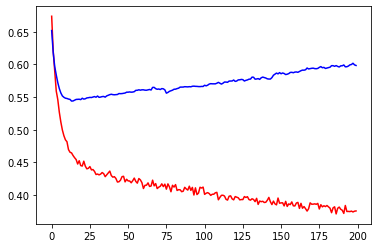

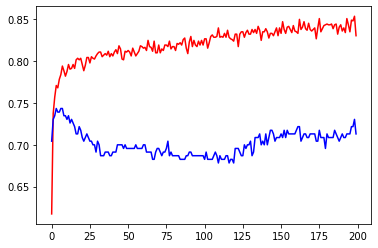

In [26]:
from matplotlib import pyplot as plt

epochs_list = list(range(history.params['epochs']))
plt.plot(epochs_list, history.history['loss'], color='red')
plt.plot(epochs_list, history.history['val_loss'], color='blue')
plt.show()

plt.plot(epochs_list, history.history['binary_accuracy'], color='red')
plt.plot(epochs_list, history.history['val_binary_accuracy'], color='blue')
plt.show()

In [27]:
model = keras.models.load_model('model.hdf5')

In [28]:
train_predicted_probabilites = model.predict(train_data_x)
validation_predicted_probabilites = model.predict(validation_data_x)
test_predicted_probabilities = model.predict(test_data_x)

print('----------------')
print('training metrics')
print('----------------')
print_metrics(train_predicted_probabilites[:, 1], train_data_y[:, 1])

print('')
print('-------------------')
print('validation metrics')
print('-------------------')
print_metrics(validation_predicted_probabilites[:, 1], validation_data_y[:, 1])

print('')
print('------------')
print('test metrics')
print('------------')
print_metrics(test_predicted_probabilities[:, 1], test_data_y[:, 1])

4/4 [==============================] - 0s 2ms/step
----------------
training metrics
----------------
accuracy (at threshold 0.5): 0.7951582867783985

confusion matrix:
[[307  35]
 [ 75 120]]

FNR: 0.19633507853403143
FPR: 0.22580645161290322

auc: 0.864432448642975

precision: 0.7741935483870968
recall: 0.6153846153846154
fscore: 0.6857142857142857

-------------------
validation metrics
-------------------
accuracy (at threshold 0.5): 0.7304347826086957

confusion matrix:
[[66 14]
 [17 18]]

FNR: 0.20481927710843373
FPR: 0.4375

auc: 0.7646428571428572

precision: 0.5625
recall: 0.5142857142857142
fscore: 0.5373134328358209

------------
test metrics
------------
accuracy (at threshold 0.5): 0.75

confusion matrix:
[[65 13]
 [16 22]]

FNR: 0.19753086419753085
FPR: 0.37142857142857144

auc: 0.8292847503373819

precision: 0.6285714285714286
recall: 0.5789473684210527
fscore: 0.6027397260273972


## With Dropout and L2 Regularization

In [29]:
model = keras.Sequential()
model.add(keras.Input(shape=(8,))) 
model.add(keras.layers.Dense(1024, activation=None, kernel_regularizer=keras.regularizers.L2(l2=1e-4)))
model.add(keras.layers.LeakyReLU(alpha=0.05))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='sigmoid'))
 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1024)              9216      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 2)                 2050      
                                                                 
Total params: 11,266
Trainable params: 11,266
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
             metrics=['binary_accuracy'])

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='model.hdf5',
    monitor='val_binary_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(train_data_x, 
          train_data_y, 
          validation_data=(validation_data_x, validation_data_y),
          batch_size=8, 
          epochs=200,
          callbacks=[model_checkpoint_callback])

Epoch 1/200
68/68 [==============================] - 1s 4ms/step - loss: 0.6675 - binary_accuracy: 0.6322 - val_loss: 0.6469 - val_binary_accuracy: 0.7087
Epoch 2/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6229 - binary_accuracy: 0.7272 - val_loss: 0.6160 - val_binary_accuracy: 0.7174
Epoch 3/200
68/68 [==============================] - 0s 3ms/step - loss: 0.5843 - binary_accuracy: 0.7523 - val_loss: 0.5968 - val_binary_accuracy: 0.7391
Epoch 4/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5620 - binary_accuracy: 0.7598 - val_loss: 0.5818 - val_binary_accuracy: 0.7304
Epoch 5/200
68/68 [==============================] - 0s 3ms/step - loss: 0.5405 - binary_accuracy: 0.7654 - val_loss: 0.5697 - val_binary_accuracy: 0.7261
Epoch 6/200
68/68 [==============================] - 0s 2ms/step - loss: 0.5217 - binary_accuracy: 0.7793 - val_loss: 0.5602 - val_binary_accuracy: 0.7348
Epoch 7/200
68/68 [==============================] - 0s 2ms/step - los

68/68 [==============================] - 0s 2ms/step - loss: 0.4035 - binary_accuracy: 0.8277 - val_loss: 0.5728 - val_binary_accuracy: 0.6739
Epoch 106/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4030 - binary_accuracy: 0.8296 - val_loss: 0.5721 - val_binary_accuracy: 0.6783
Epoch 107/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4061 - binary_accuracy: 0.8212 - val_loss: 0.5690 - val_binary_accuracy: 0.6913
Epoch 108/200
68/68 [==============================] - 0s 2ms/step - loss: 0.4050 - binary_accuracy: 0.8315 - val_loss: 0.5696 - val_binary_accuracy: 0.6957
Epoch 109/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3986 - binary_accuracy: 0.8315 - val_loss: 0.5704 - val_binary_accuracy: 0.6957
Epoch 110/200
68/68 [==============================] - 0s 2ms/step - loss: 0.3977 - binary_accuracy: 0.8287 - val_loss: 0.5709 - val_binary_accuracy: 0.6957
Epoch 111/200
68/68 [==============================] - 0s 2ms/step - los

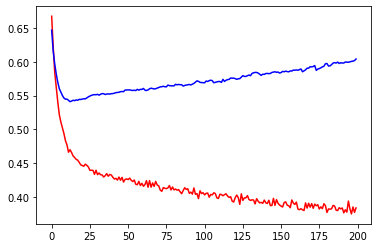

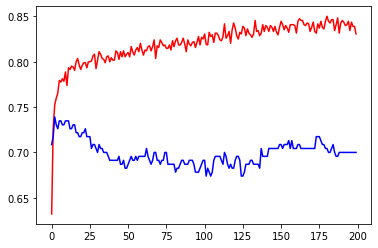

In [31]:
epochs_list = list(range(history.params['epochs']))
plt.plot(epochs_list, history.history['loss'], color='red')
plt.plot(epochs_list, history.history['val_loss'], color='blue')
plt.show()

plt.plot(epochs_list, history.history['binary_accuracy'], color='red')
plt.plot(epochs_list, history.history['val_binary_accuracy'], color='blue')
plt.show()

In [32]:
model = keras.models.load_model('model.hdf5')

train_predicted_probabilites = model.predict(train_data_x)
validation_predicted_probabilites = model.predict(validation_data_x)
test_predicted_probabilities = model.predict(test_data_x)

print('----------------')
print('training metrics')
print('----------------')
print_metrics(train_predicted_probabilites[:, 1], train_data_y[:, 1])

print('')
print('-------------------')
print('validation metrics')
print('-------------------')
print_metrics(validation_predicted_probabilites[:, 1], validation_data_y[:, 1])

print('')
print('------------')
print('test metrics')
print('------------')
print_metrics(test_predicted_probabilities[:, 1], test_data_y[:, 1])

4/4 [==============================] - 0s 2ms/step
----------------
training metrics
----------------
accuracy (at threshold 0.5): 0.776536312849162

confusion matrix:
[[313  29]
 [ 91 104]]

FNR: 0.22524752475247525
FPR: 0.21804511278195488

auc: 0.8554355975408606

precision: 0.7819548872180451
recall: 0.5333333333333333
fscore: 0.6341463414634146

-------------------
validation metrics
-------------------
accuracy (at threshold 0.5): 0.7478260869565218

confusion matrix:
[[69 11]
 [18 17]]

FNR: 0.20689655172413793
FPR: 0.39285714285714285

auc: 0.7664285714285715

precision: 0.6071428571428571
recall: 0.4857142857142857
fscore: 0.5396825396825397

------------
test metrics
------------
accuracy (at threshold 0.5): 0.7758620689655172

confusion matrix:
[[70  8]
 [18 20]]

FNR: 0.20454545454545456
FPR: 0.2857142857142857

auc: 0.8630229419703104

precision: 0.7142857142857143
recall: 0.5263157894736842
fscore: 0.6060606060606061
